In [13]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install plotly
!pip install Ipython
!pip install ipywidgets


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## IMPORTING THE LIBRARIES

In [14]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from ipywidgets import interact
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [15]:
#Read the dataset
df = pd.read_csv(r"C:\Users\Asus\Desktop\OPTICROP\opticrop\Data\Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## DATA PREPROCESSING

In [16]:
#Handling missing values

df.shape

df.info()

df.isnull().sum()

(2200, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Figure size 800x400 with 0 Axes>

<Axes: >

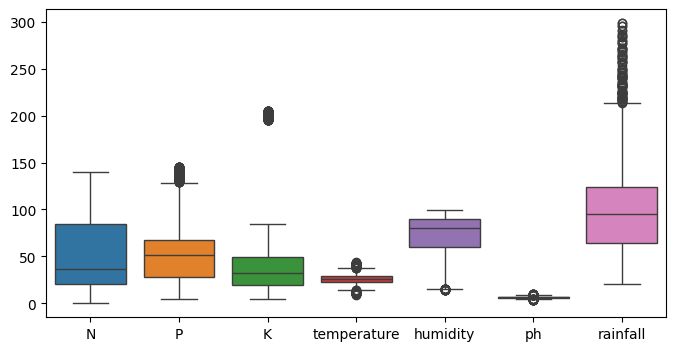

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(df)

In [18]:
Q1 = df['P'].quantile (0.25) 
Q3 = df['P'].quantile(0.75) 
IQR =Q3-Q1 #IQR is interquartilę range.

filter = (df['P'] >= Q1 - 1.5* IQR) & (df['P'] <= Q3 + 1.5 *IQR) 
df=df.loc[filter]

In [19]:
#changes
def plot_distribution(data, feature):
    plt.figure(figsize=(12, 5))

    # Histogram and KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

    # Probability plot
    plt.subplot(1, 2, 2)
    stats.probplot(data[feature], dist="norm", plot=plt)
    plt.title(f'Probability Plot of {feature}')

    plt.tight_layout()
    plt.show()


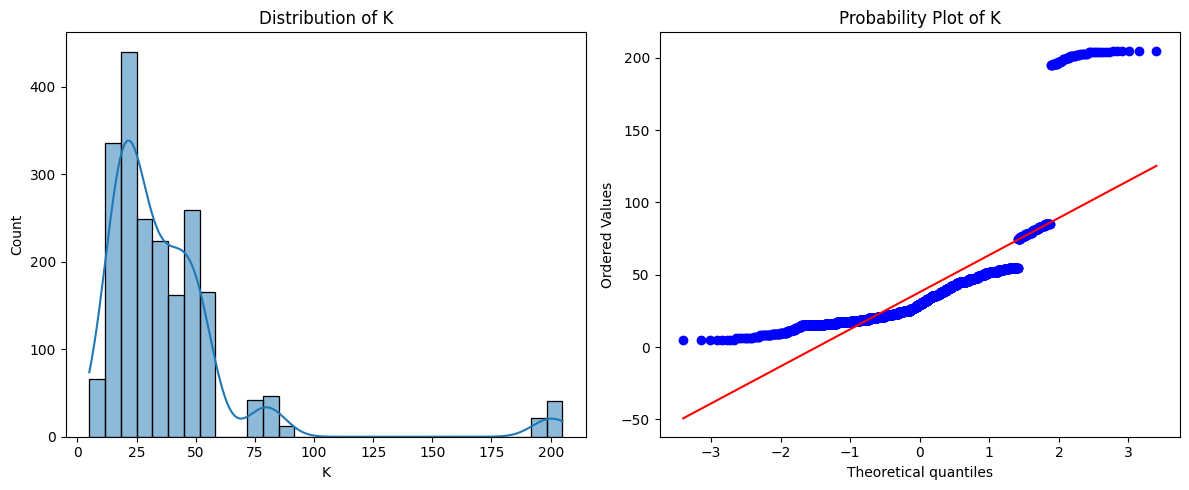

In [20]:
plot_distribution(df, 'K')


In [21]:
df['K_log'] = np.log1p(df['K'])

# Optional: Check the result
print(df[['K', 'K_log']].head())


    K     K_log
0  43  3.784190
1  41  3.737670
2  44  3.806662
3  40  3.713572
4  42  3.761200



 K (Original)


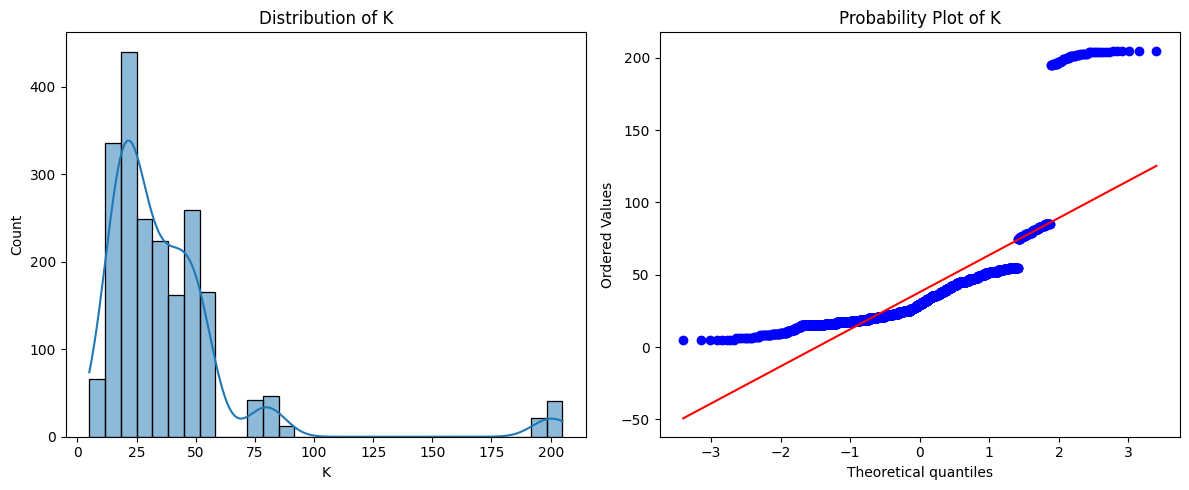


 K_log (Log Transformed)


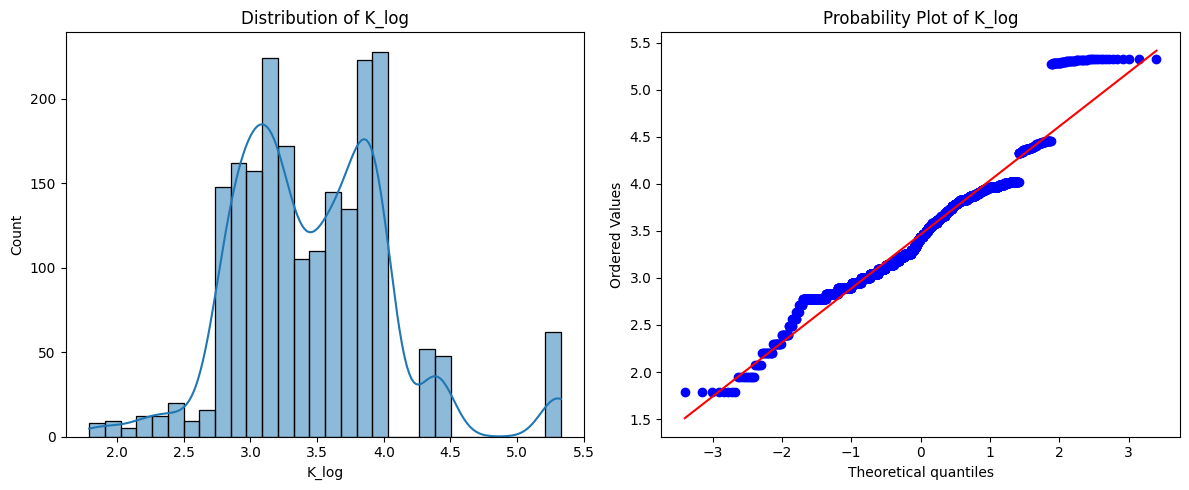

In [22]:

# Original potassium distribution
print("\n K (Original)")
plot_distribution(df, 'K')

# Log-transformed potassium distribution
print("\n K_log (Log Transformed)")
df['K_log'] = np.log1p(df['K']) 
plot_distribution(df, 'K_log')



In [23]:
#Extracting Seasonal crops based on conditions
print("Summer crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("-----------------------------------------------")

print("Winter crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("-----------------------------------------------")

print("Rainy crops")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 50)]['label'].unique())
print("-----------------------------------------------")


Summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------------------
Winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------------------
Rainy crops
['rice' 'papaya' 'coconut']
-----------------------------------------------


In [24]:
# Features (X): excluded 'label' and used 'K_log' instead of 'K'

X = df.drop(columns=['label', 'K'])  # Droping original 'K', keeping 'K_log'
y = df['label']
X.columns

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Printing the shapes
print("The shape of X_train:", X_train.shape)
print("The shape of X_test:", X_test.shape)
print("The shape of y_train:", y_train.shape)
print("The shape of y_test:", y_test.shape)

Index(['N', 'P', 'temperature', 'humidity', 'ph', 'rainfall', 'K_log'], dtype='object')

The shape of X_train: (1649, 7)
The shape of X_test: (413, 7)
The shape of y_train: (1649,)
The shape of y_test: (413,)


In [37]:
X_train = X_train[['N', 'P', 'K_log', 'temperature', 'humidity', 'ph', 'rainfall']]
X_test = X_test[['N', 'P', 'K_log', 'temperature', 'humidity', 'ph', 'rainfall']]

## VISUALISING AND ANALYSING DATA

<h3 style="text-align: center;">UNIVARIATE ANALYSIS</h3>


<Figure size 1200x800 with 0 Axes>

<Axes: >

<Axes: xlabel='N', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Nitrogen')

Text(0.5, 0, '')

Text(0, 0.5, 'Density')

<Axes: >

<Axes: xlabel='P', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Phosphorous')

Text(0.5, 0, '')

Text(0, 0.5, 'Density')

<Axes: >

<Axes: xlabel='K', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Potassium')

Text(0.5, 0, '')

Text(0, 0.5, 'Density')

<Axes: >

<Axes: xlabel='temperature', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Temperature')

Text(0.5, 0, '')

Text(0, 0.5, 'Density')

<Axes: >

<Axes: xlabel='humidity', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Humidity')

Text(0.5, 0, '')

Text(0, 0.5, 'Density')

<Axes: >

<Axes: xlabel='ph', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of PH')

Text(0.5, 0, '')

Text(0, 0.5, 'Density')

<Axes: >

<Axes: xlabel='rainfall', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of Rainfall')

Text(0.5, 0, '')

Text(0, 0.5, 'Density')

Text(0.5, 0.98, 'Distribution of agricultural conditions')

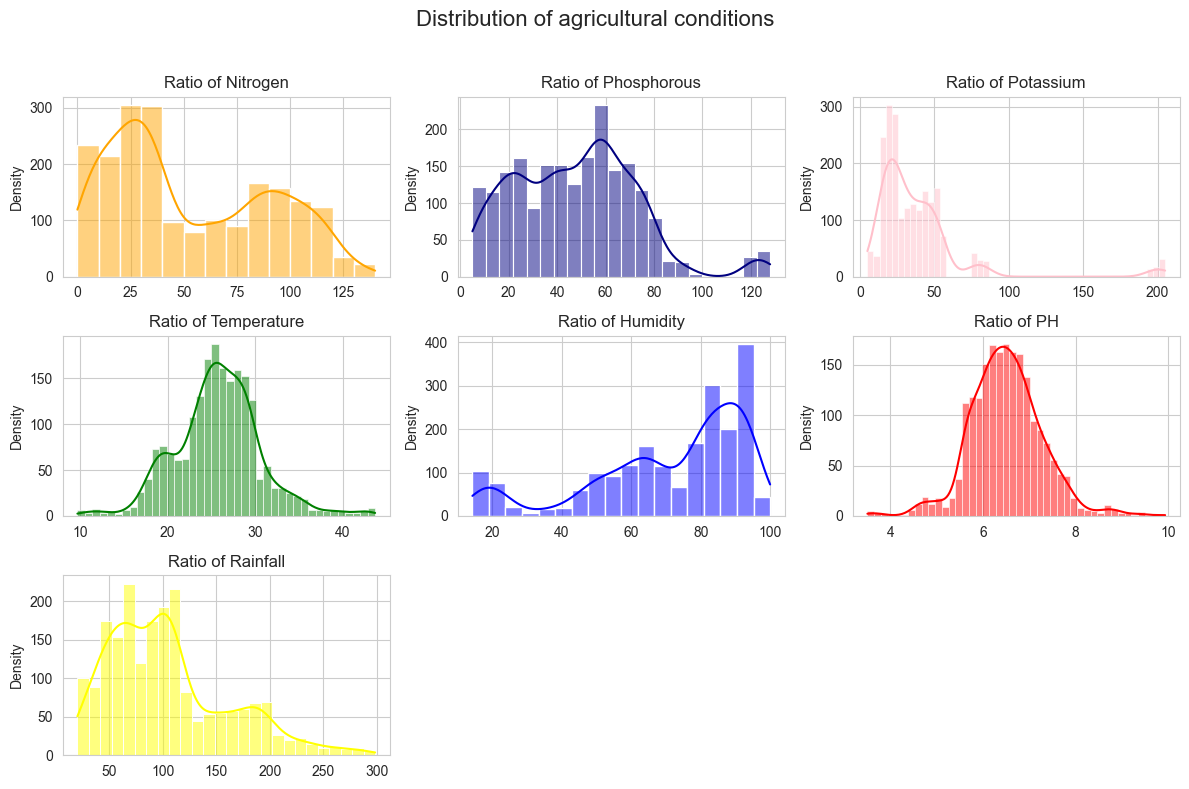

In [26]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
titles = [
    'Ratio of Nitrogen', 'Ratio of Phosphorous', 'Ratio of Potassium',
    'Ratio of Temperature', 'Ratio of Humidity', 'Ratio of PH', 'Ratio of Rainfall'
]
colors = ['orange', 'navy', 'pink', 'green', 'blue', 'red', 'yellow']

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create subplots
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True, color=colors[i])
    plt.title(titles[i])
    plt.xlabel('')
    plt.ylabel('Density')

plt.suptitle("Distribution of agricultural conditions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<Figure size 1600x600 with 0 Axes>

C:\Users\Asus\AppData\Local\Temp\ipykernel_23704\2672271945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')


<Axes: xlabel='label', ylabel='count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'banana'),
  Text(2, 0, 'jute'),
  Text(3, 0, 'cotton'),
  Text(4, 0, 'coconut'),
  Text(5, 0, 'papaya'),
  Text(6, 0, 'orange'),
  Text(7, 0, 'muskmelon'),
  Text(8, 0, 'watermelon'),
  Text(9, 0, 'maize'),
  Text(10, 0, 'mango'),
  Text(11, 0, 'pomegranate'),
  Text(12, 0, 'lentil'),
  Text(13, 0, 'blackgram'),
  Text(14, 0, 'mungbean'),
  Text(15, 0, 'mothbeans'),
  Text(16, 0, 'pigeonpeas'),
  Text(17, 0, 'kidneybeans'),
  Text(18, 0, 'chickpea'),
  Text(19, 0, 'coffee'),
  Text(20, 0, 'grapes'),
  Text(21, 0, 'apple')])

Text(0.5, 1.0, 'Crop Count Distribution')

Text(0.5, 0, 'Crop Type')

Text(0, 0.5, 'Count')

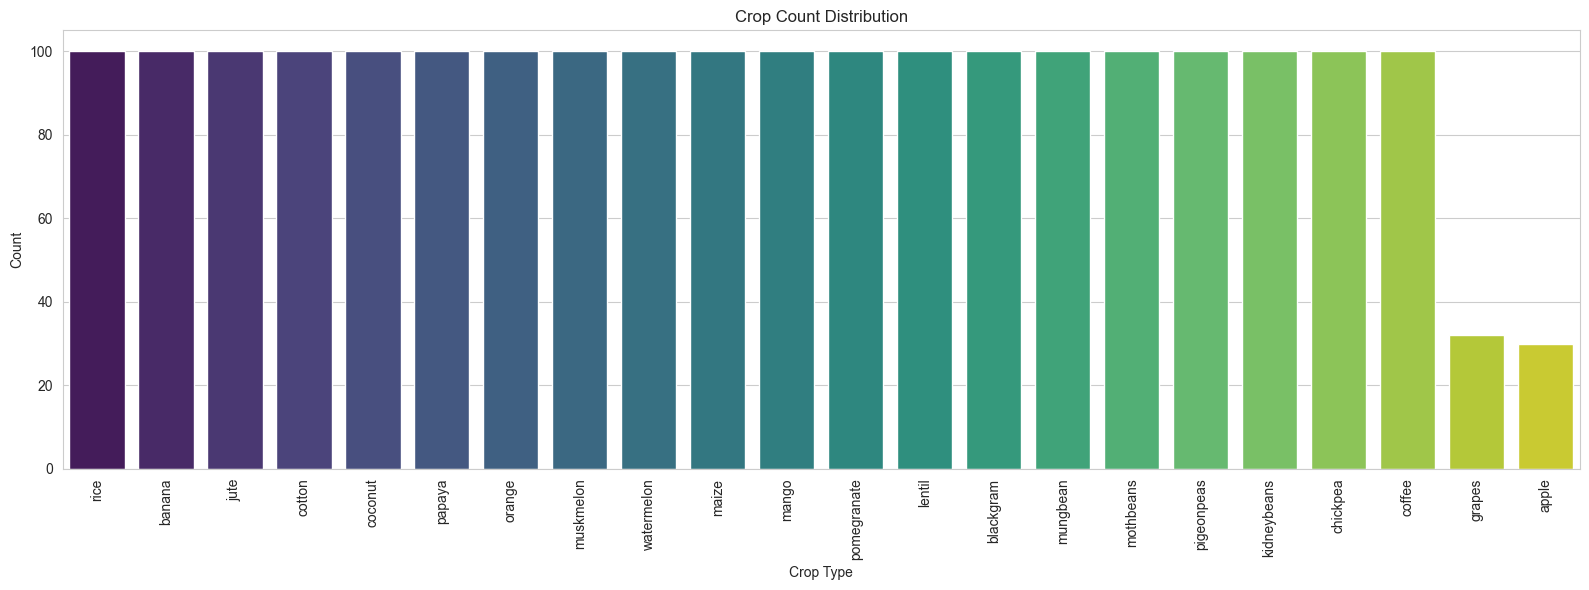

In [27]:
#Countplot for Categorical Feature
# ===============================
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Crop Count Distribution')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

<h3 style="text-align: center;">BIVARIATE ANALYSIS</h3>


<Figure size 2000x1000 with 0 Axes>

<Axes: >

<Axes: xlabel='N', ylabel='label'>

Text(0.5, 1.0, 'N vs Label')

Text(0.5, 0, 'N')

Text(0, 0.5, 'label')

<Axes: >

<Axes: xlabel='P', ylabel='label'>

Text(0.5, 1.0, 'P vs Label')

Text(0.5, 0, 'P')

Text(0, 0.5, 'label')

<Axes: >

<Axes: xlabel='K', ylabel='label'>

Text(0.5, 1.0, 'K vs Label')

Text(0.5, 0, 'K')

Text(0, 0.5, 'label')

<Axes: >

<Axes: xlabel='temperature', ylabel='label'>

Text(0.5, 1.0, 'temperature vs Label')

Text(0.5, 0, 'temperature')

Text(0, 0.5, 'label')

<Axes: >

<Axes: xlabel='humidity', ylabel='label'>

Text(0.5, 1.0, 'humidity vs Label')

Text(0.5, 0, 'humidity')

Text(0, 0.5, 'label')

<Axes: >

<Axes: xlabel='ph', ylabel='label'>

Text(0.5, 1.0, 'ph vs Label')

Text(0.5, 0, 'ph')

Text(0, 0.5, 'label')

<Axes: >

<Axes: xlabel='rainfall', ylabel='label'>

Text(0.5, 1.0, 'rainfall vs Label')

Text(0.5, 0, 'rainfall')

Text(0, 0.5, 'label')

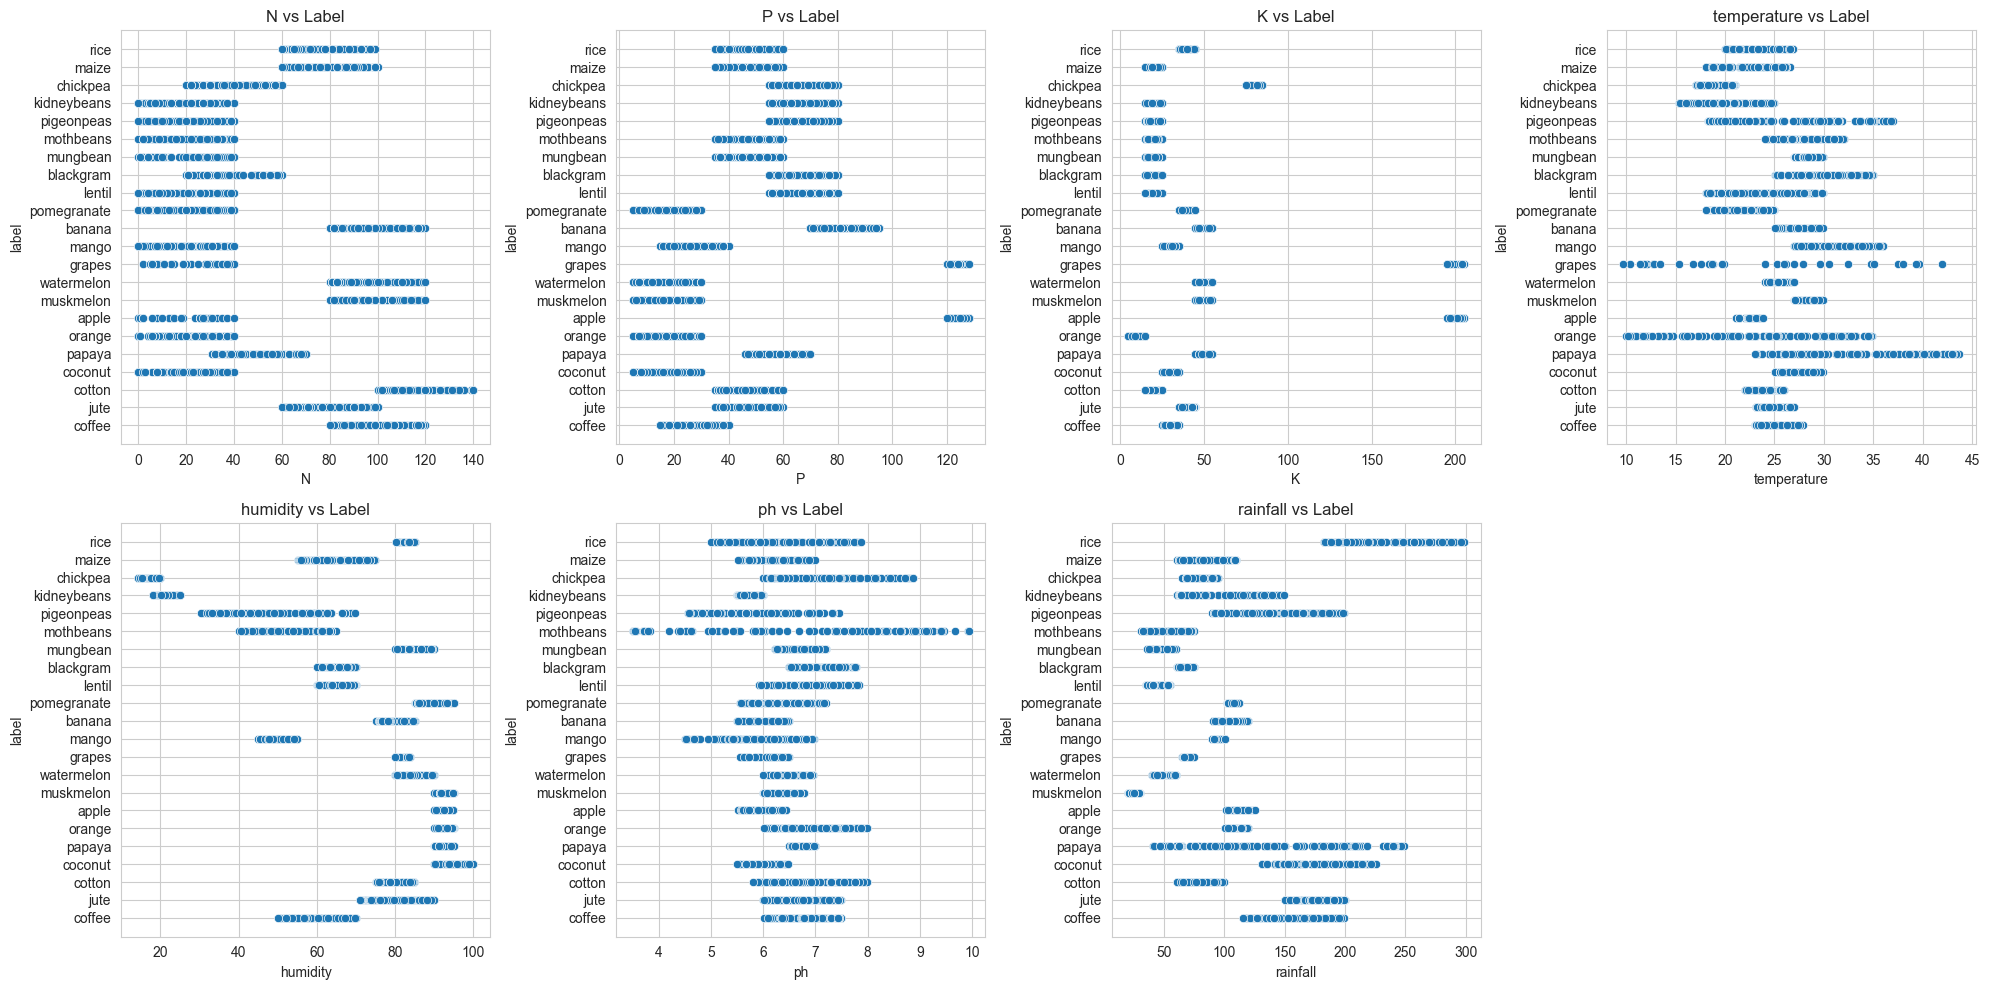

In [28]:
# Features to plot
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create subplots
plt.figure(figsize=(20, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.scatterplot(x=df[feature], y=df['label'])
    plt.title(f'{feature} vs Label')
    plt.xlabel(feature)
    plt.ylabel('label')

plt.tight_layout()
plt.show()

<h3 style="text-align: center;">MULTIVARIATE ANALYSIS</h3>


<Axes: ylabel='count'>

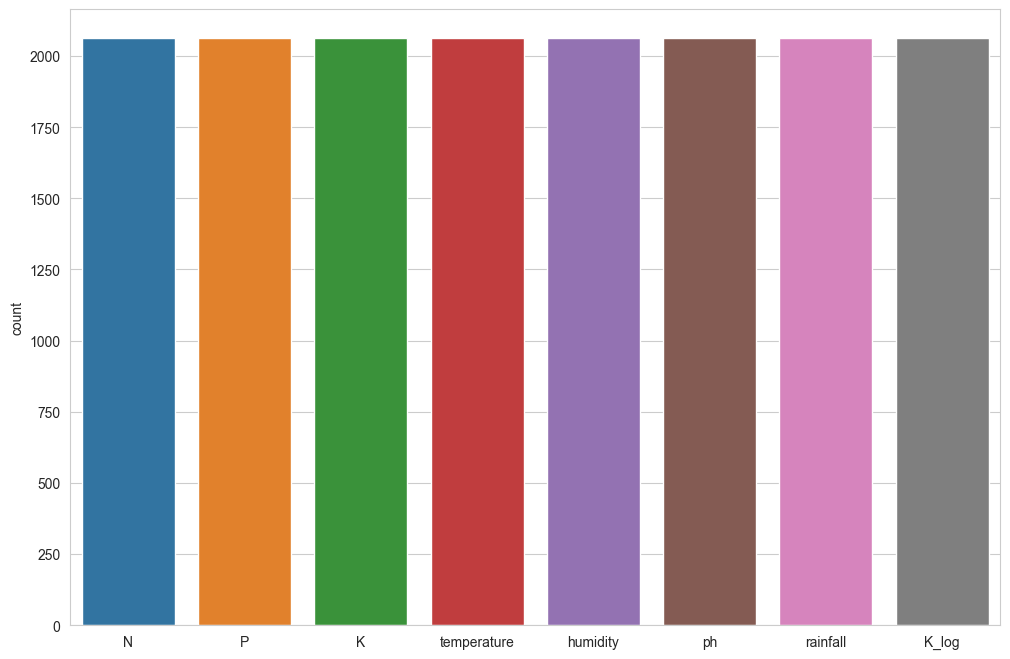

In [29]:
sns.countplot(df)

<h3 style="text-align: center;">DESCRIPTIVE ANALYSIS</h3>


In [30]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,K_log
count,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000,2062.000000
mean,52.440349,47.706596,37.996605,25.770363,70.433297,6.502347,104.286486,3.462439
std,37.246143,25.479349,33.049629,4.885812,22.569963,0.785073,56.385635,0.587897
min,0.000000,5.000000,5.000000,9.724458,14.258040,3.504752,20.211267,1.791759
25%,22.000000,27.000000,20.000000,23.080864,58.469697,6.016597,62.940621,3.044522
50%,39.000000,48.000000,30.000000,25.768297,79.175605,6.469677,94.772563,3.433987
75%,87.000000,64.000000,46.000000,28.614586,89.130631,6.956328,132.787974,3.850148
max,140.000000,128.000000,205.000000,43.675493,99.981876,9.935091,298.560117,5.327876


## MODEL BUILDING

<h3 style="text-align: center;">KMeans</h3>


In [31]:
# kmeans algorithm is initialized and training data is passed to the model with .fit() function. 
# Test data is predicted with .predict() function and saved in new variable. 
# For evaluating the model, confusion matrix and classification report is done.

,n_clusters,1
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


,n_clusters,2
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


,n_clusters,6
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


,n_clusters,7
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


,n_clusters,8
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


,n_clusters,9
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


,n_clusters,10
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


Text(0.5, 1.0, 'The Elbow method')

Text(0.5, 0, 'No of Clusters')

Text(0, 0.5, 'WCSS')

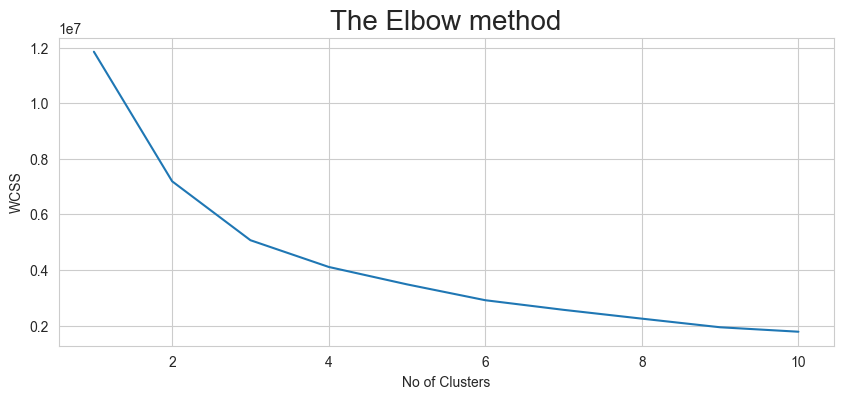

In [32]:
# Elbow method used to find out no of clusters and determine the optimum number of clusters within the dataset.
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow method", fontsize=20)
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.show()

In [33]:
km = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(X)

a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis=1)
z = z.rename(columns={0: 'cluster'})

print("Lets check the results after applying the K-Means clustering analysis \n")
print("Crops in First cluster:", z[z['cluster'] == 0]['label'].unique())
print("__________________________________________________\n")

print("Crops in Second cluster:", z[z['cluster'] == 1]['label'].unique())
print("__________________________________________________\n")

print("Crops in Third cluster:", z[z['cluster'] == 2]['label'].unique())
print("__________________________________________________\n")

print("Crops in Fourth cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the results after applying the K-Means clustering analysis 

Crops in First cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' nan 'grapes' 'muskmelon' 'apple' 'orange']
__________________________________________________

Crops in Second cluster: ['maize' 'banana' nan 'grapes' 'watermelon' 'muskmelon' 'orange' 'papaya'
 'coconut' 'cotton' 'jute']
__________________________________________________

Crops in Third cluster: ['rice' 'pigeonpeas' 'apple' nan 'orange' 'papaya' 'coconut' 'cotton'
 'jute']
__________________________________________________

Crops in Fourth cluster: ['maize' 'kidneybeans' 'pigeonpeas' 'pomegranate' 'mango' 'muskmelon'
 'apple' nan 'orange' 'papaya' 'cotton' 'jute']


<h3 style="text-align: center;">LOGISTIC REGRESSION</h3>


In [48]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Evaluating performance of the model

<Axes: >

Text(0.5, 1.0, 'Confusion matrix for logistic regression')

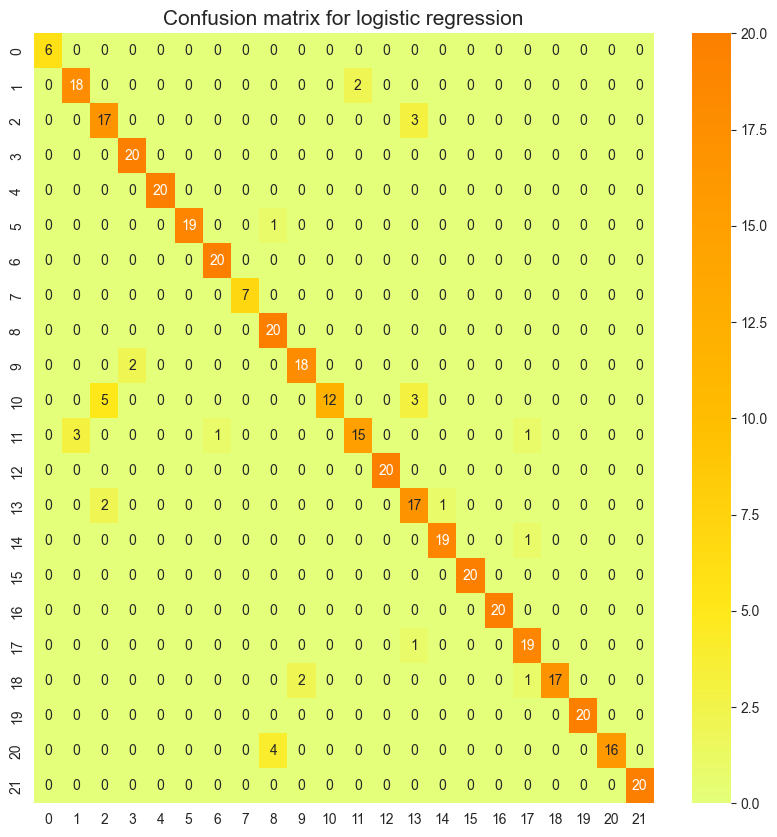

In [43]:
# Let's print the confusion matrix first
plt.rcParams["figure.figsize"] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Wistia')

plt.title("Confusion matrix for logistic regression", fontsize=15)
plt.show()

In [44]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         6
      banana       0.86      0.90      0.88        20
   blackgram       0.71      0.85      0.77        20
    chickpea       0.91      1.00      0.95        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      0.95      0.97        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00         7
        jute       0.80      1.00      0.89        20
 kidneybeans       0.90      0.90      0.90        20
      lentil       1.00      0.60      0.75        20
       maize       0.88      0.75      0.81        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.71      0.85      0.77        20
    mungbean       0.95      0.95      0.95        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       0.86    

### Predict the best crop according to given parameters

In [ ]:
prediction = model.predict((np.array([[105, 35, 40, 25, 64, 7, 160]])))
print("The suggested crop for given climatic condition is: ", prediction)


The suggested crop for given climatic condition is:  ['coffee']


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [55]:
!pip install streamlit pyngrok

                                              0.0/9.9 MB ? eta -:--:--
                                              0.0/9.9 MB ? eta -:--:--
                                              0.0/9.9 MB 1.3 MB/s eta 0:00:08
                                              0.0/9.9 MB 393.8 kB/s eta 0:00:25
                                              0.1/9.9 MB 491.5 kB/s eta 0:00:20
                                              0.1/9.9 MB 476.3 kB/s eta 0:00:21
                                              0.1/9.9 MB 476.3 kB/s eta 0:00:21
                                              0.1/9.9 MB 476.3 kB/s eta 0:00:21
                                              0.1/9.9 MB 476.3 kB/s eta 0:00:21
                                              0.1/9.9 MB 476.3 kB/s eta 0:00:21
                                              0.1/9.9 MB 476.3 kB/s eta 0:00:21
                                              0.2/9.9 MB 458.5 kB/s eta 0:00:22
                                              0.2/9.9 MB 458

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^

In [71]:
import pickle

# Save the model in the OPTICROP folder
with open(r'C:\Users\Asus\Desktop\OPTICROP\model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved in OPTICROP folder")

# Load the model from the same OPTICROP folder
with open(r'C:\Users\Asus\Desktop\OPTICROP\model.pkl', 'rb') as file:
    model = pickle.load(file)

print("Model loaded successfully!")


Model saved in OPTICROP folder
Model loaded successfully!


In [74]:
import pandas as pd

# Sample input (replace with real values if needed)
input_data = pd.DataFrame([[90, 40, 40, 25, 65, 6.5, 120]],
                          columns=['N', 'P', 'K_log', 'temperature', 'humidity', 'ph', 'rainfall'])

# Predict
prediction = model.predict(input_data)

print("Prediction:", prediction[0])


Prediction: maize
